<a href="https://colab.research.google.com/github/shubhamkarkar/DesignOptimization2021Fall/blob/main/DO_HW3_1_(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shubham Ashok Karkar  

ASU ID : 1223319344  

MAE-598 Design Optimization

Homework-3


---
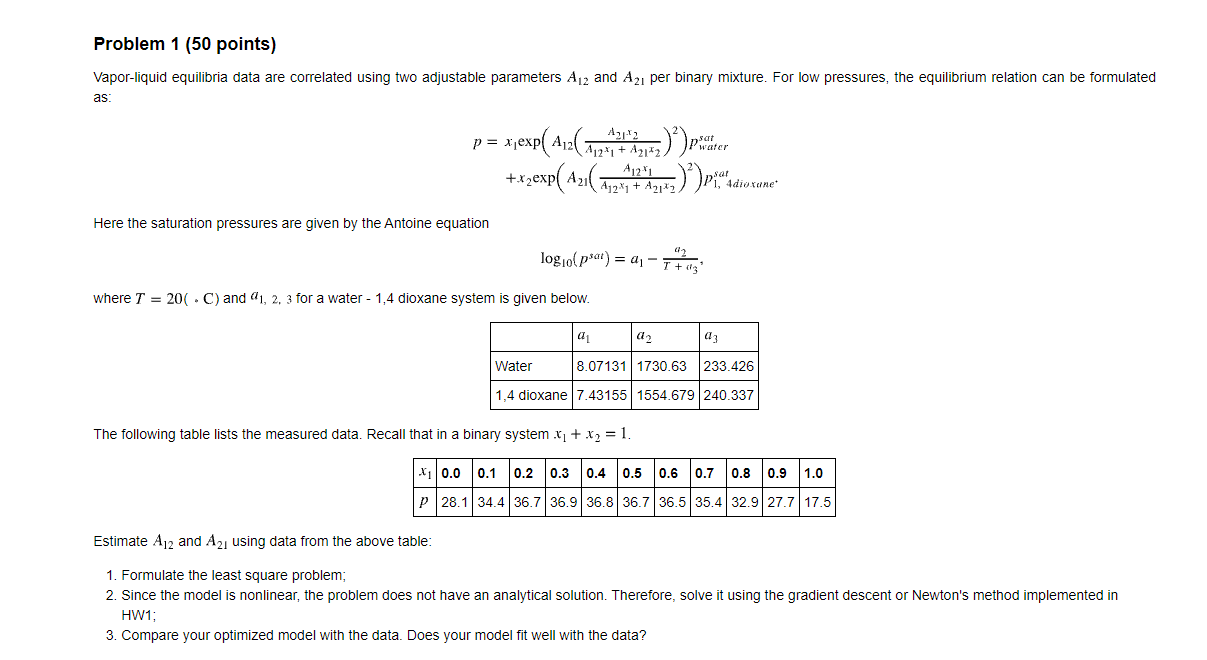

In [111]:

import numpy as np
import importlib
import torch as t

from torch.autograd import Variable


#Calculating the saturation pressure:

a_W = [8.07131, 1730.63,  233.426]
a_14dio = [7.43155, 1554.679, 240.337]

T_val=20   #(T = 20 & a_{1,2,3} for a water - 1,4 dioxane system)
p_sat_W = sat_pressure(T_val, a_W)
p_sat_14dio = sat_pressure(T_val, a_14dio)

print('p_sat_water =',p_sat_W)
print('p_sat_1,4dioxane =',p_sat_14dio )


A = Variable(t.tensor([0.6, 0.4]), requires_grad=True)

#observations:
x_obs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_obs = [28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]

#For Gradient Descent
for i in range(max_iter_num):
    loss = loss_loop(x_obs, p_obs, A, p_sat_water, p_sat_dio)
    loss.backward()
    
    
    #Hence, we don't need this algorithm to be differential with x.
    with t.no_grad():
        A -= a * A.grad
        
        if t.norm(A.grad) < e:
            break
        A.grad.zero_()
        
A_est = A.data.numpy()
print('A12=',A_est[0])
print('A21=',A_est[1]) 
print("Value of loss function:")     
print(loss.data.numpy())



p_sat_water = 17.47325208459706
p_sat_1,4dioxane = 28.824099527405245
A12= 1.9584197
A21= 1.6891853
Value of loss function:
0.6701896


Part-3

After comparing the model with the data, we can say that the fit tends to be accurate from graphical.


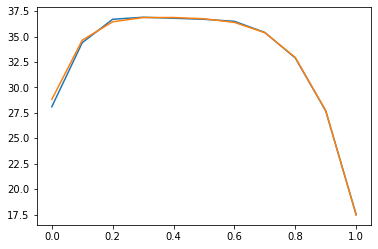

In [109]:
## Graph for comparison:
import matplotlib.pyplot as plt
plt.plot(x_obs, p_obs)
plt.plot(x_obs, p_est)

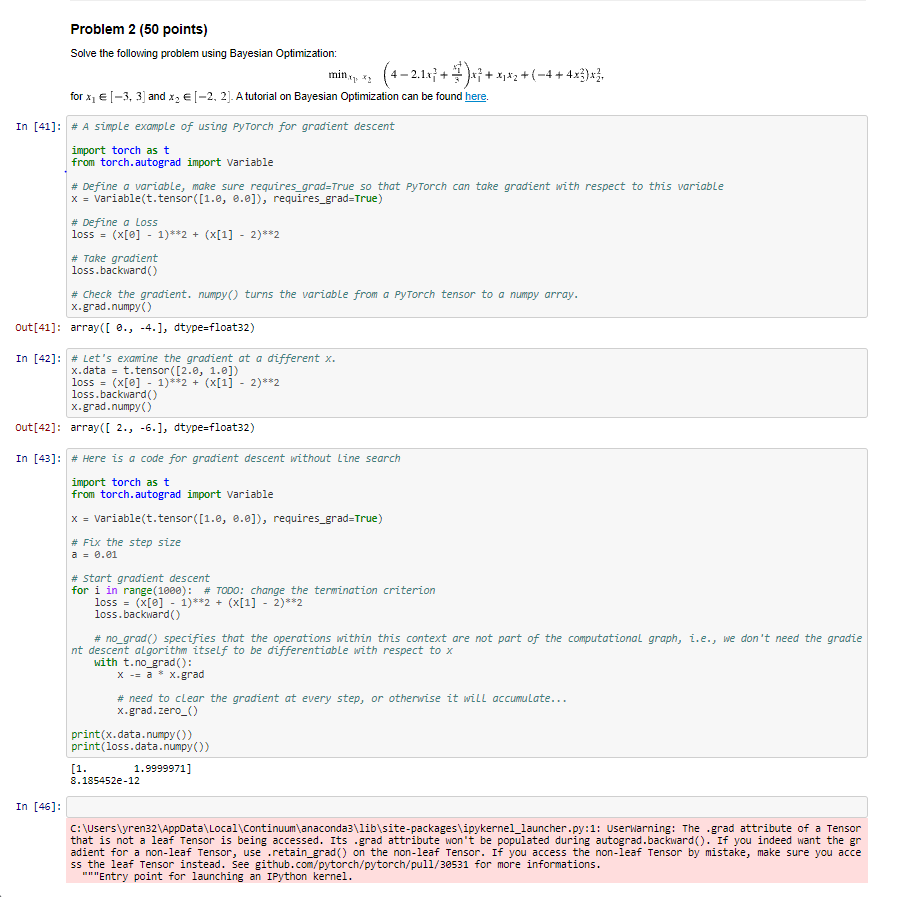